In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from cycler import cycler

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

default_cycler = cycler(marker=['o', '*', 'X', 'P', '>', 'D'])
color_dict = {
    '100': 'b',
    '200': 'r',
    '300': 'yellow',
    '400': 'c',
    '500': 'm'
}
plt.rc('axes', prop_cycle=default_cycler)


In [2]:
def p2f(x):
    return float(x.strip('%'))/100

In [3]:
df2 = pd.read_csv('period_test.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df4 = pd.read_csv('cad_success1.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df5 = pd.read_csv('cad_success3.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df2 = df2[df2['mode']=='BF'][:]
df2['mode'] = 'cad_success_2'
df4['mode'] = 'cad_success_1'
df5['mode'] = 'cad_success_3'


In [4]:
df = pd.concat([df2, df4, df5], axis=0, sort=False)

In [5]:
df = df.sort_values(['mode', 'period', 'nodes'])

In [6]:
df['c_sensor_buffer_packet_rate'] = df['c_sensor_buffer_packets'] / df['nodes']
df['c_sensor_drop_packet_rate'] = df['c_sensor_drop_packets'] / df['nodes']
df['c_sensor_success_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['nodes']
df['c_sensor_success_padding_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['c_sensor_want_send_packets']



In [7]:
sector = df.groupby('mode', as_index=False)

In [8]:
df

mode  nodes  period  c_packet_rate  c_sensor_want_send_packets  \
80  cad_success_1    100     100        0.94822                        3447   
82  cad_success_1    200     100        0.90159                        7115   
84  cad_success_1    300     100        0.87551                       10859   
81  cad_success_1    400     100        0.88291                       14198   
83  cad_success_1    500     100        0.86277                       18040   
..            ...    ...     ...            ...                         ...   
35  cad_success_3    100     950        1.00000                         366   
37  cad_success_3    200     950        1.00000                         752   
39  cad_success_3    300     950        0.98365                        1112   
36  cad_success_3    400     950        0.97579                        1563   
38  cad_success_3    500     950        0.97273                        1845   

    c_sensor_buffer_packets  c_sensor_send_success  c_sensor_drop_packets  \
80                     2829                    618                      0   
82                     6423                    692                      0   
84                    10119                    740                      0   
81                    13455                    743                      0   
83                    17252                    788                      0   
..                      ...                    ...                    ...   
35                      100                    266                      0   
37                      430                    322                      0   
39                      745                    367                      0   
36                     1149                    414                      0   
38                     1405                    440                      0   

    c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
80                    28.290000                        0.0   
82                    32.115000                        0.0   
84                    33.730000                        0.0   
81                    33.637500                        0.0   
83                    34.504000                        0.0   
..                          ...                        ...   
35                     1.000000                        0.0   
37                     2.150000                        0.0   
39                     2.483333                        0.0   
36                     2.872500                        0.0   
38                     2.810000                        0.0   

    c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  
80                      5.860000                              0.170003  
82                      3.119501                              0.087688  
84                      2.159591                              0.059663  
81                      1.640005                              0.046204  
83                      1.359726                              0.037686  
..                           ...                                   ...  
35                      2.660000                              0.726776  
37                      1.610000                              0.428191  
39                      1.203332                              0.324640  
36                      1.009943                              0.258463  
38                      0.856002                              0.231979  

[270 rows x 12 columns]

In [9]:
df.to_csv('cad.csv')

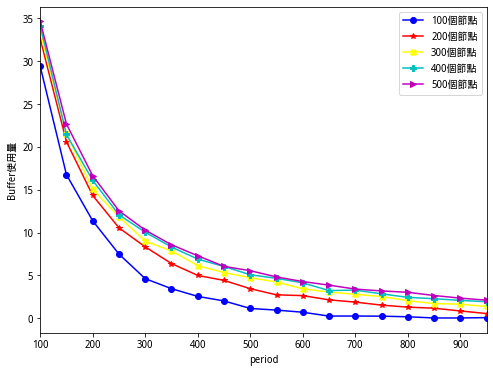

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
    
plt.ylabel('Buffer使用量')
plt.legend()

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_1').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退0次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])
# for label, df in sector.get_group('cad_success_3').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退3次_'+str(label))


ax.set_ylim([200, 900])
plt.ylabel('封包到達量')
plt.xlabel('發送頻率')
plt.legend()

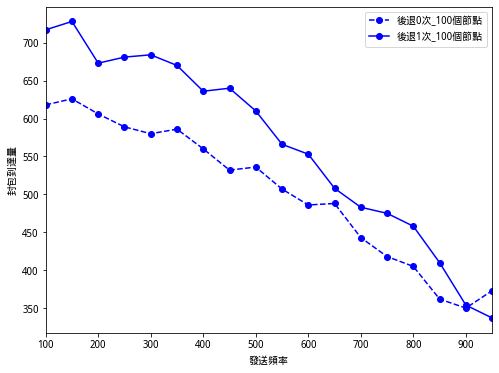

In [46]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_1').groupby('nodes'):
    if label == 100:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退0次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    if label == 100:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])
# for label, df in sector.get_group('cad_success_3').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退3次_'+str(label))

plt.ylabel('封包到達量')
plt.xlabel('發送頻率')
plt.legend()

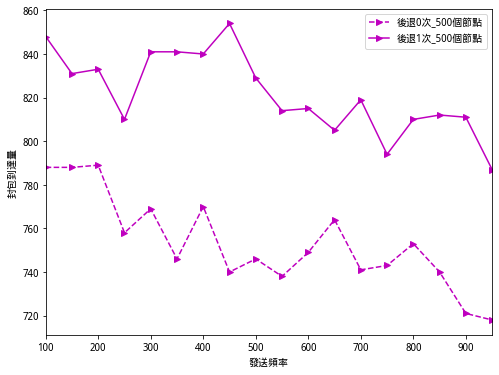

In [40]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_1').groupby('nodes'):
    if label == 500:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退0次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    if label == 500:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])
# for label, df in sector.get_group('cad_success_3').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退3次_'+str(label))

plt.ylabel('封包到達量')
plt.xlabel('發送頻率')
plt.legend()

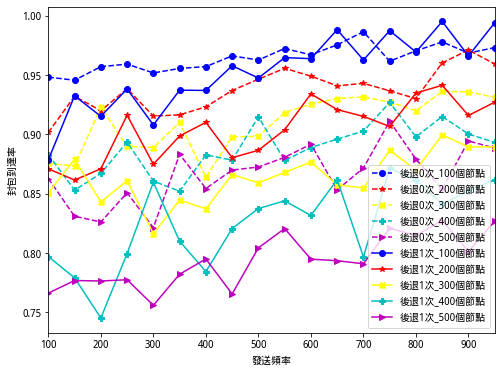

In [41]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_1').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=f'後退0次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])
# for label, df in sector.get_group('cad_success_3').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退3次_'+str(label))

plt.ylabel('封包到達率')
plt.xlabel('發送頻率')
plt.legend()

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_3').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退2次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])

    
ax.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.1) 

plt.ylabel('封包到達量')
plt.xlabel('發送頻率')

Text(0.5, 0, '發送頻率')

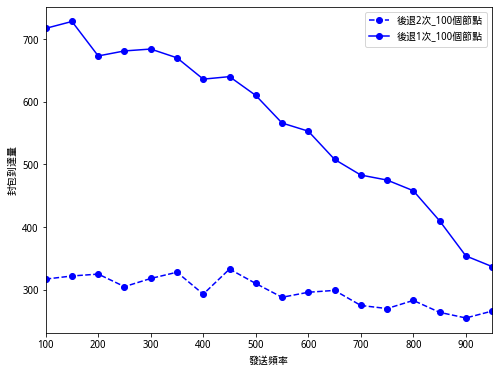

In [43]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_3').groupby('nodes'):
    if label == 100:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退2次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    if label == 100:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])

        
plt.ylabel('封包到達量')
plt.xlabel('發送頻率')
plt.legend()

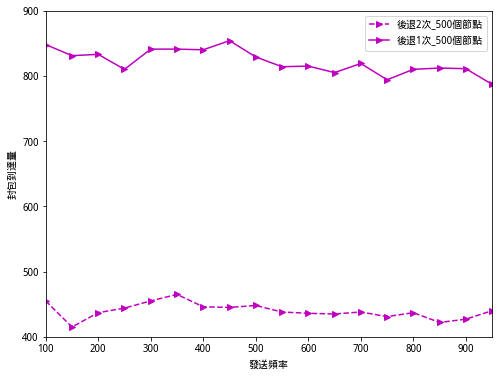

In [44]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_3').groupby('nodes'):
    if label == 500:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退2次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    if label == 500:
        df.plot(x='period',y='c_sensor_send_success', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])

ax.set_ylim([400, 900])

plt.ylabel('封包到達量')
plt.xlabel('發送頻率')
plt.legend()

In [45]:
fig, ax = plt.subplots(figsize=(8,6))

m = {
    '100': 'o',
    '200': '*',
    '300': 'X',
    '400': 'P',
    '500': '>'
}

for label, df in sector.get_group('cad_success_3').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=f'後退2次_{label}個節點', linestyle='--', marker=m[f"{label}"], color=color_dict[f"{label}"])
for label, df in sector.get_group('cad_success_2').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=f'後退1次_{label}個節點', linestyle='-', marker=m[f"{label}"], color=color_dict[f"{label}"])

plt.ylabel('封包到達率')
plt.xlabel('發送頻率')
plt.legend()